O conjunto escolhido para a primeira parte da prática foi o Titanic, que pode ser visualizado rodando o código abaixo:

In [1]:
import numpy as np
import pandas as pd
import csv

titanic = pd.read_csv("./datasets/titanic/train.csv")
df = pd.DataFrame(data=titanic)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Hipóteses propostas:
1. A porcentagem de crianças que sobreviveram é maior que a porcentagem de adultos que sobreviveram (colunas Survived[1] e Age[5]);
2. A porcentagem de pessoas acompanhadas que sobreviveram é maior que a de pessoas desacompanhadas que sobreviveram (colunas Survived[1] e SibSp[6]).
3. Os sobreviventes tem uma taixa mairo de Fare (colunas Survived[1] e Fare[9]);

In [2]:
from matplotlib import pyplot as plt

titanic.columns[[1,5,6,9]]

Index(['Survived', 'Age', 'SibSp', 'Fare'], dtype='object')

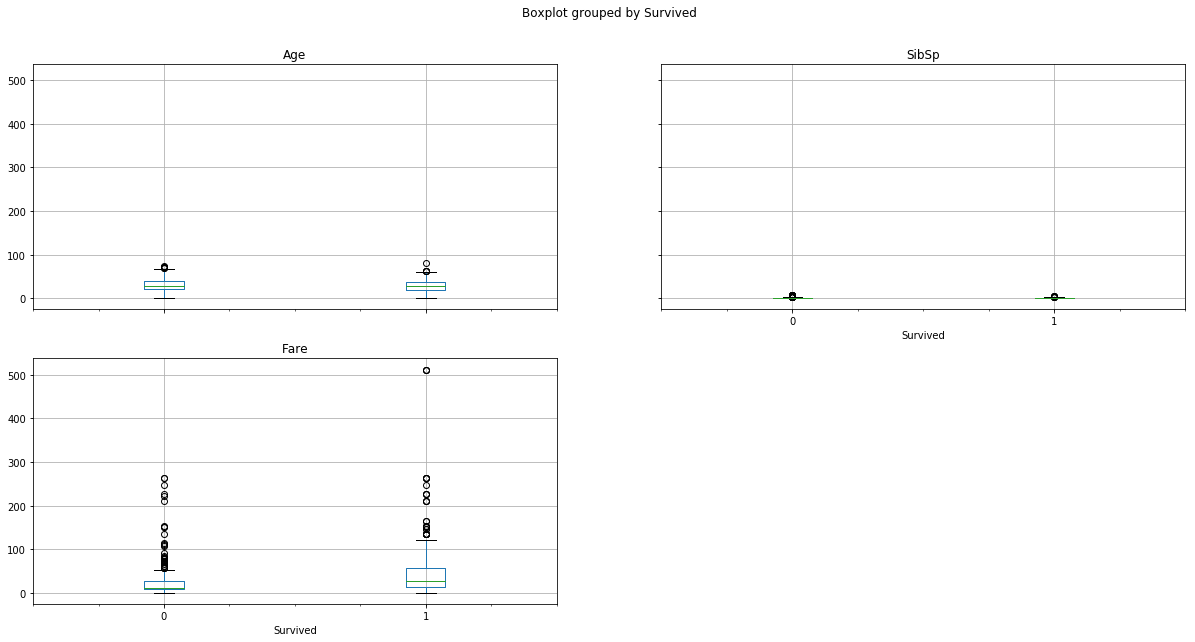

In [3]:
titanic.boxplot(column=titanic.columns[[5,6,9]].tolist(), by='Survived', figsize=(20,10))
plt.show()

O boxplot ajuda numa melhor compreensão dos dados, expondo os dados de maneira visual e simples de entender.
O boxplot é útil de ser usado sobre dados numéricos não categóricos para análise de seu comportamento tanto no geral quando para comparar conjuntos específicos de dados.

In [4]:
titanic[titanic.Age > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


Não parece haver outliers acima apesar do boxplot apontar como sendo.

In [5]:
titanic[titanic.Fare > 50.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN


Não parece haver outliers acima apesar do boxplot apontar como sendo.

In [6]:
titanic[titanic.SibSp > 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S


Não parece haver outliers acima apesar do boxplot apontar como sendo.

In [7]:
print("Age: ", titanic.Age.max() - titanic.Age.min())
print("Fare: ", titanic.Fare.max() - titanic.Fare.min())
print("SibSp: ", titanic.SibSp.max() - titanic.SibSp.min())

Age:  79.58
Fare:  512.3292
SibSp:  8


Neste caso o intervalo máximo não induz ao erro ao interpretá-lo mas em alguns casos pode, como por exemplo: o consumo de água da população mundial que varia de acordo com a regiao, idade, dentre outros.

**- Momentos estatísticos centrados e originais, até o quarto.**

Código abaixo contem as funções feitas para o cálculo do momento:

In [8]:
def calc(values):
    med = 0.0
    quant = 0.0
    for i in range(values.shape[0]):
        if(np.isnan(values[i]) == False):
            quant += 1.0
            med += values[i]
    med /= quant

    m2 = 0.0
    m3 = 0.0
    m4 = 0.0
    for i in range(values.shape[0]):
        if(np.isnan(values[i]) == False):
            m2 += (values[i] - med)**2
            m3 += (values[i] - med)**3
            m4 += (values[i] - med)**4
    m2 /= quant
    m3 /= quant
    m4 /= quant

    print('Momento 1: ', med, '| Momento 2:', m2, '| Momento 3:', m3, '| Momento 4:', m4)

def momento(nome, name1, name2, class1, class2):
    print(nome, ' ', name1, '-> ', sep='', end='')
    calc(class1)
    print(nome, ' ', name2, '-> ', sep='', end='')
    calc(class2)
    
v_sobrevivente = np.ndarray.astype((titanic["Survived"] == 1).values, dtype=np.bool)
sobrevivente1 = titanic[v_sobrevivente]
sobrevivente0 = titanic[np.logical_not(v_sobrevivente)]

**Momento da coluna Age**

In [9]:
momento('Age', 'Survived=0', 'Survived=1', sobrevivente0.Age.values, sobrevivente1.Age.values)

Age Survived=0-> Momento 1:  30.6261792453 | Momento 2: 200.374998609 | Momento 3: 1655.05975457 | Momento 4: 131098.473222
Age Survived=1-> Momento 1:  28.3436896552 | Momento 2: 222.7601688 | Momento 3: 596.865367285 | Momento 4: 145033.870841


**Momento da coluna SibSp**

In [10]:
momento('SibSp', 'Survived=0', 'Survived=1', sobrevivente0.SibSp.values, sobrevivente1.SibSp.values)


SibSp Survived=0-> Momento 1:  0.553734061931 | Momento 2: 1.65694871616 | Momento 3: 7.47841504884 | Momento 4: 47.5903384805
SibSp Survived=1-> Momento 1:  0.473684210526 | Momento 2: 0.500769467528 | Momento 3: 0.690868445352 | Momento 4: 2.0951300592


**Momento da coluna Fare**

In [11]:
momento('Fare', 'Survived=0', 'Survived=1', sobrevivente0.Fare.values, sobrevivente1.Fare.values)

Fare Survived=0-> Momento 1:  22.1178868852 | Momento 2: 983.42493815 | Momento 3: 140034.082272 | Momento 4: 28162900.1655
Fare Survived=1-> Momento 1:  48.3954076023 | Momento 2: 4422.19185381 | Momento 3: 1130954.02166 | Momento 4: 456504169.776


O uso dos momentos é indicados quando precisa-se saber a distribuição dos dados. Média e variância funcionam bem quando a distribuição é normal

Pelos momentos, nenhum dos atributos parecem seguir distribuição normal.

**3- Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para questões**

A partir da análise do boxplot a primeira e a segunda hipótese foram refutadas apesar da análise das médias ter confirmado as mesmas hipóteses na prática anterior. Já a terceira hipótese foi confirmada.